# Ultralytics YOLO11

YOLO11은 네트워크의 구조적 개선을 통해 정확도와 효율성을 동시에 향상시킨 다양한 컴퓨터 비전 작업에 최적화된 모델입니다.

이 모델은 특히 실시간 객체 탐지, 인스턴스 분할, 자세 추정, 이미지 분류, 방향 객체 탐지 (OBB) 등에서 뛰어난 성능을 발휘합니다.


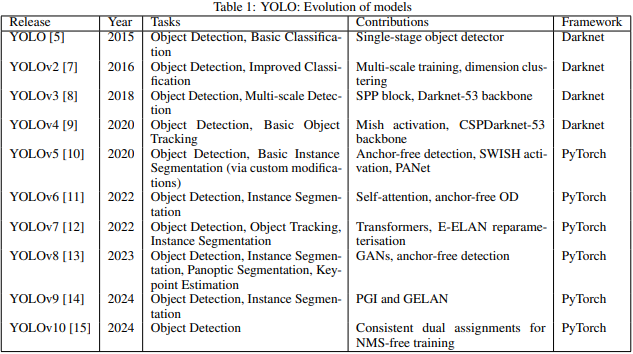

## YOLO11의 주요 특징

- 다양한 모델 크기 지원: YOLO11은 Nano(n), Small(s), Medium(m), Large(l), Extra-large(x) 등 다양한 크기의 모델을 제공하여, 경량화된 장치부터 고성능 서버까지 다양한 환경에 적합합니다.

- 다양한 비전 작업 지원: 객체 탐지, 인스턴스 분할, 이미지 분류, 자세 추정, 방향 객체 탐지 등 다양한 컴퓨터 비전 작업을 지원합니다 .

- 높은 정확도와 효율성: YOLO11은 이전 버전인 YOLOv8m보다 22% 적은 파라미터를 사용하면서도 COCO 데이터셋에서 더 높은 평균 정밀도(mAP)를 달성하여, 정확도와 효율성을 동시에 향상시켰습니다 .

## YOLO11의 네트워크 구조

YOLO11의 아키텍처는 크게 세 부분으로 구성됩니다: **Backbone**, **Neck**, **HEad**.

각 구성 요소는 다음과 같은 특징을 가집니다.

### 1. Backbone - C3k2 블록 도입

YOLO11은 기존의 C2f 블록을 대체하여 **C3k2** 블록을 도입했습니다.

이 블록은 Cross Stage Partial (CSP) 구조를 기반으로 하며, 두 개의 작은 커널을 사용하는 방식으로 설계되어 연산 효율성을 높였습니다.

이러한 구조는 특징 추출 과정에서 계산량을 줄이면서도 성능을 유지하도록 돕습니다

CSP block
- Scaled-YOLOv4: https://arxiv.org/pdf/2011.08036

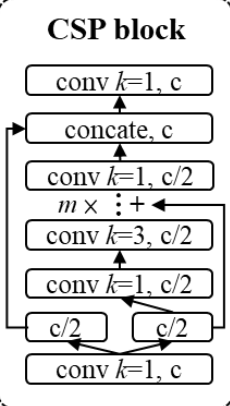

### 2. Neck – SPPF와 C2PSA 블록 통합


Neck 부분에서는 기존의 SPPF(Spatial Pyramid Pooling - Fast) 블록을 유지하면서, 새로운 C2PSA(Cross Stage Partial with Spatial Attention) 블록을 추가했습니다.

C2PSA는 어텐션 메커니즘을 통해 중요한 영역에 집중하여 특징 맵의 품질을 향상시킵니다 .

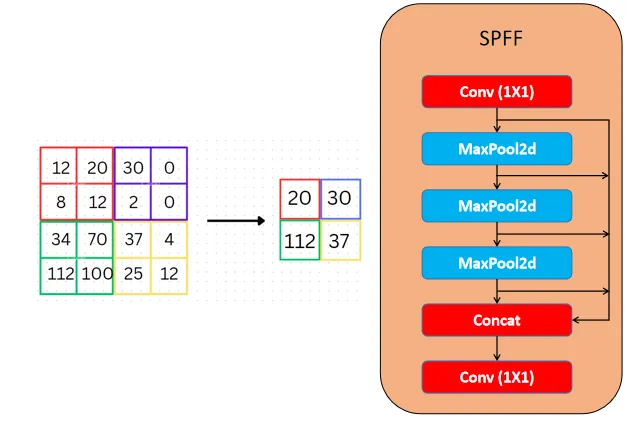

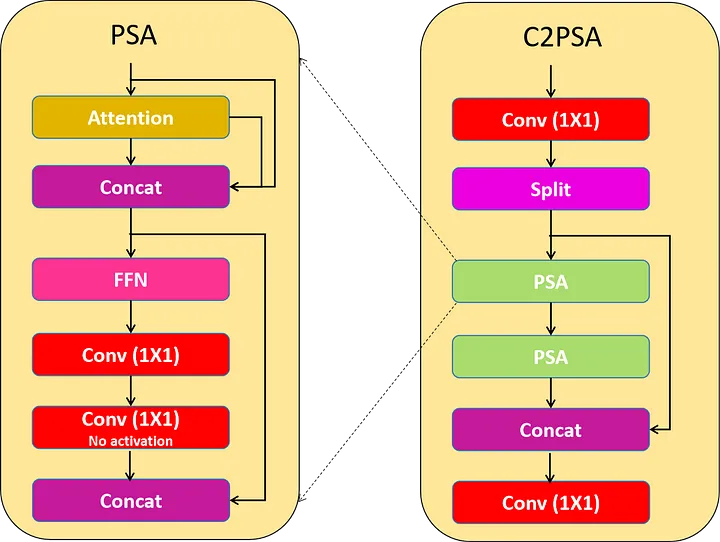

### 3. Head – 경량화된 예측 헤드

YOLO11은 YOLOv10의 End-to-End 헤드 구조를 계승하여, **깊이별 분리 컨볼루션(Depthwise Separable Convolution)**을 활용한 경량화된 예측 헤드를 도입했습니다.

이로 인해 연산량이 줄어들고, 실시간 처리 속도가 향상되었습니다.

## YOLO11n 모델을 VOC dataset으로 훈련하기

### 1. 환경 설정 및 Ultralytics 설치

In [1]:
# Ultralytics 설치
!pip install ultralytics onnx onnxruntime-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
# 버전 확인
import ultralytics
print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.170


### 2. VOC 데이터셋 다운로드 및 준비

In [3]:
# VOC 데이터셋 다운로드
!pip install gdown
!gdown 1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB
!tar -xf VOCtrainval_11-May-2012.tar
!rm VOCtrainval_11-May-2012.tar

Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB

but Gdown can't. Please check connections and permissions.
tar: VOCtrainval_11-May-2012.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
rm: cannot remove 'VOCtrainval_11-May-2012.tar': No such file or directory


In [4]:
# 데이터셋 구조 확인
!ls VOCdevkit/VOC2012/

ls: cannot access 'VOCdevkit/VOC2012/': No such file or directory


### 3. 데이터셋을 YOLO 형식으로 변환


실습하고 있는 데이터셋은 라벨링이 xml 파일 포맷으로 제공되며, 해당 포맷은 YOLOv7을 활용해 객체 인식 신경망을 훈련할 때 사용할 수 있는 파일 포맷이 아닙니다.

convert2Yolo라고 하는 깃허브 저장소에서 Pascal VOC 데이터셋의 xml 파일 형태를 YOLOv11을 통한 훈련에 사용할 수 있도록 변환하는 기능을 제공합니다. 이를 활용해 xml 파일 포맷을 txt 파일 포맷으로 변환하겠습니다.

이 과정에 앞서 다음과 같이 Pascal VOC 데이터셋의 클래스 리스트가 있는 파일을 생성합니다.

In [5]:
classes = ["aeroplane\n", "bicycle\n", "bird\n", "boat\n", "bottle\n",
           "bus\n", "car\n", "cat\n", "chair\n", "cow\n", "diningtable\n",
           "dog\n", "horse\n", "motorbike\n", "person\n", "pottedplant\n",
           "sheep\n", "sofa\n", "train\n", "tvmonitor"]
with open("vocnames.txt", 'w') as f:
    f.writelines(classes)

vocnames.txt 파일이 생성된 것을 확인한 후 다음과 같이 VOCdevkit/VOC2012 폴더 아래에 labels 폴더를 생성한 후 convert2Yolo 저장소를 활용해 xml 파일을 txt 파일로 변환합니다

In [6]:
!git clone https://github.com/ssaru/convert2Yolo.git
!cd convert2Yolo && python3 example.py --datasets VOC \
--img_path ../VOCdevkit/VOC2012/JPEGImages/ \
--label ../VOCdevkit/VOC2012/Annotations/ \
--convert_output_path ../VOCdevkit/VOC2012/JPEGImages/ \
--img_type ".jpg" \
--manifest_path ../ \
--cls_list_file ../vocnames.txt

Cloning into 'convert2Yolo'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 215 (delta 38), reused 35 (delta 35), pack-reused 172 (from 1)
Receiving objects: 100% (215/215), 994.67 KiB | 43.25 MiB/s, done.
Resolving deltas: 100% (95/95), done.
VOC Parsing Result : False, msg : ERROR : , moreInfo : <class 'StopIteration'>	Format.py	238


다운로드 완료 후 훈련을 위한 이미지가 있는 폴더의 경로는 아래와 같습니다.

/content/VOCdevkit/VOC2012/JPEGImages/

YOLOv11을 통한 객체 인식 신경망을 훈련하기 위해 각 이미지 내 객체의 위치가 라벨링되어 있는 텍스트 파일은 이미지와 같은 폴더에 있습니다.

YOLOv11에서 훈련할 때 이미지와 같은 경로에 이미지와 동일한 이름의 라벨링 된 텍스트 파일이 있어야만 훈련을 수행할 수 있습니다. 구체적인 파일 구조는 아래와 같습니다.

```
$Object_Detection_Dataset/
                         ┗ 1.png
                         ┗ 1.txt
                         ┗ 2.jpg
                         ┗ 2.txt
```

이제 데이터를 훈련 데이터와 검증 데이터로 나누겠습니다.

In [8]:
import os
import shutil
from tqdm import tqdm
data_root = "/content/VOCData"
val_root = os.path.join(data_root, "val")
train_root = os.path.join(data_root, "train")
os.makedirs(val_root, exist_ok=True)
os.makedirs(train_root, exist_ok=True)

with open("/content/manifest.txt") as f:
    files = f.readlines()

for idx, img_path in tqdm(enumerate(files)):
    img_src = img_path.split('\n')[0]
    txt_src = os.path.splitext(img_src)[0] + ".txt"
    img_name = os.path.split(img_src)[-1]
    text_name = os.path.split(txt_src)[-1]
    if idx % 10 < 3:
        img_dst = os.path.join(val_root, img_name)
        text_dst = os.path.join(val_root, text_name)
    else:
        img_dst = os.path.join(train_root, img_name)
        text_dst = os.path.join(train_root, text_name)
    shutil.copy2(img_src, img_dst)
    shutil.copy2(txt_src, text_dst)

FileNotFoundError: [Errno 2] No such file or directory: '/content/manifest.txt'

### 4. 데이터셋 구성 파일 생성

In [9]:
text_lines = """path: /content/VOCData # dataset root dir
train: train # train images (relative to 'path')
val: val # val images (relative to 'path')
test: #optional

names:
  0: aeroplane
  1: bicycle
  2: bird
  3: boat
  4: bottle
  5: bus
  6: car
  7: cat
  8: chair
  9: cow
  10: diningtable
  11: dog
  12: horse
  13: motorbike
  14: person
  15: pottedplant
  16: sheep
  17: sofa
  18: train
  19: tvmonitor"""
with open("/content/vocdata.yaml", 'w') as f:
    f.write(text_lines)

### 5. YOLOv11n 모델 훈련

In [11]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# # Train the model
# train_results = model.train(
#     data="vocdata.yaml",  # path to dataset YAML
#     epochs=10,  # number of training epochs
#     imgsz=640,  # training image size
#     device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
#     batch=64,
#     name="yolov11n_voc",  # name of trained model
#     save_dir="runs/detect/yolov11n_voc"
#)


100%|██████████| 5.35M/5.35M [00:00<00:00, 307MB/s]


### 6. 모델 추론 및 시각화

100%|██████████| 49.2k/49.2k [00:00<00:00, 49.8MB/s]


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 61.2ms
Speed: 12.3ms preprocess, 61.2ms inference, 327.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


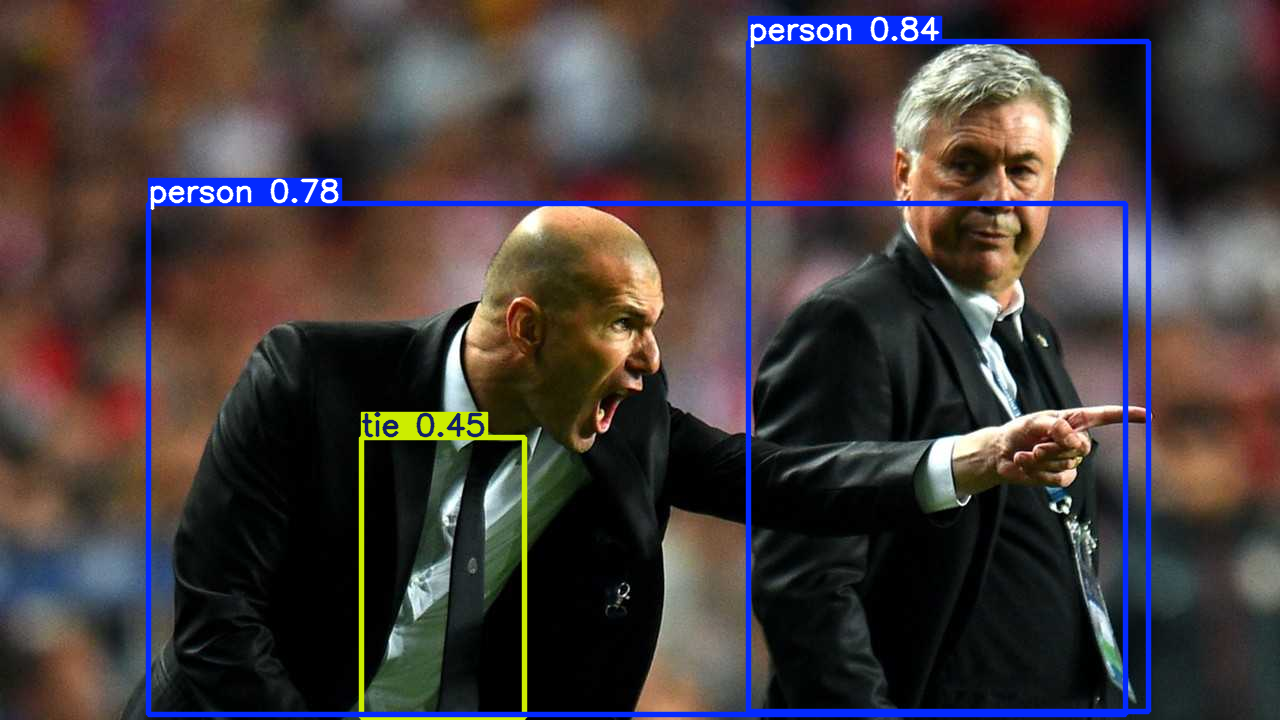

In [12]:
# 이미지 추론
results = model.predict(source='https://ultralytics.com/images/zidane.jpg', save=True)

# 결과 시각화
results[0].show()

### 7. 모델을 ONNX 형식으로 변환

In [13]:
# ONNX로 모델 변환
model.export(format='onnx')

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.5s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 4.7s, saved as 'yolo11n.onnx' (10.2 MB)

Export complete (5.2s)
Results saved to /content
Predict:         yolo predict task=detect model=yolo11n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolo11n.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visua

'yolo11n.onnx'

### 8. OpenCV 및 ONNX Runtime을 사용한 추론

In [ ]:
import cv2
import onnxruntime as ort
import numpy as np

# 1) 클래스 이름 로드
def get_class_names():
  coco_dict = dict()
    return class_names

# 2) ONNX Runtime 세션 생성
def get_session(model_path, providers=['CPUExecutionProvider', 'CUDAExecutionProvider']):
    session = ort.InferenceSession(model_path, providers=providers)
    input_name = session.get_inputs()[0].name  # 보통 'images'
    return session, input_name


# 3) 이미지 로드 및 전처리 (640×640 리사이즈, RGB, 정규화)
def preprocessing(image_path):
    orig_image = cv2.imread(image_path)
    orig_h, orig_w = orig_image.shape[:2]
    img = cv2.resize(orig_image, (640, 640))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
    input_tensor = np.transpose(img_rgb, (2, 0, 1))[None, ...]  # (1,3,640,640)
    return orig_image, orig_h, orig_w, input_tensor

# 4) 추론 실행
def inference_image(session, input_name, input_tensor):
    outputs = session.run(None, {input_name: input_tensor})
    return outputs[0] # outputs[0].shape == (1, C, N)  e.g. (1,24,8400)

# 5) 결과 후처리
def get_detection_output(outputs, object_threshold, iou_threshold):
    results = outputs.transpose()  # (N, C) -> (C, N)
    if len(results[0]) != 5:
        class_filtered_results = []
        for detection in results:
            class_id = detection[4:].argmax()
            confidence_score = detection[4:].max()
            new_detection = np.append(detection[:4],[class_id,confidence_score])
            class_filtered_results.append(new_detection)
        results = np.array(class_filtered_results)

    boxes = results[:, :4]  # [x1, y1, x2, y2]
    conf_scores = results[:, -1]  # confidence scores
    # 겹치는 박스 제거를 위한 NMS와 thresholding
    indices = cv2.dnn.NMSBoxes(boxes.tolist(), conf_scores.tolist(), score_threshold=object_threshold, nms_threshold=iou_threshold)

    if len(indices) == 0:
        return np.empty((0, 6))  # No detections after NMS
    return results[indices.flatten()]

# 6) 결과 시각화
def visualize(class_names, results, orig_image, orig_h, orig_w):
    result_image = orig_image.copy()
    cx, cy, w, h, class_id, confidence = results[:,0], results[:,1], results[:,2], results[:,3], results[:,4], results[:,-1]
    cx = cx/640.0 * orig_w
    cy = cy/640.0 * orig_h
    w = w/640.0 * orig_w
    h = h/640.0 * orig_h
    x1 = cx - w/2
    y1 = cy - h/2
    x2 = cx + w/2
    y2 = cy + h/2
    for box, class_idx, score in zip(zip(x1, y1, x2, y2), class_id, confidence):
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        class_idx = int(class_idx)
        score = "{:.2f}".format(score)
        cv2.rectangle(result_image,(int(x1),int(y1)),(int(x2),int(y2)),(255,0, 0),1)
        cv2.putText(result_image,class_names[class_idx]+' '+score,(x1,y1-17),
                    cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),1)
    return result_image

In [ ]:
model_path = 'runs/detect/yolov11n_voc/weights/best.onnx'
image_path = '/content/zidane.jpg'
object_threshold = 0.5
nms_threshold = 0.5
class_names = get_class_names()
session, input_name = get_session(model_path, ['CUDAExecutionProvider'])
orig_image, orig_h, orig_w, input_tensor = preprocessing(image_path)
outputs = inference_image(session, input_name, input_tensor)
detections = get_detection_output(outputs, object_threshold, nms_threshold)
result_image = visualize(class_names, detections, orig_image, orig_h, orig_w)
cv2.imwrite('result.jpg', result_image)